# Working on Yelp Restaurants Dataset

* To see how the data is genereted by using Yelp API calls, and transformed to csv file. Go to Yelp-api folder, and put your API KEY in to config.py file, select the term "restaurants" then select "search location", and run the search.py file in your environment.


In [323]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import pandas as pd
import random
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
import seaborn as sns; sns.set()
from sklearn import datasets
import matplotlib.colors as mcolors
import warnings
import requests
import gmaps
import os
warnings.simplefilter(action='ignore')
# Import API key
from api_keys import g_key

In [324]:
# File to Load 
yelp_data_to_load = "data/PyRestaurants_data.csv"

In [325]:
# Read data file and store into Pandas DataFrames
Restaurants_df = pd.read_csv(yelp_data_to_load)
Restaurants_df.head()

,id,name,phone,location.address1,location.address2,location.city,location.state,location.country,price,rating,review_count,Display Adress,Latitude,Longtiude,url
0,6i7KnRylm4bhPIApDFSVCg,Dave's Hot Chicken,1.323537e+10,970 N Western Ave,NaN,Los Angeles,CA,US,$$,4.5,3132,"970 N Western Ave, Los Angeles, CA, US",34.088087,-118.308968,https://www.yelp.com/biz/daves-hot-chicken-los...
1,qAAoilHU25Qr45FOQlA19g,Kang Ho-dong Baekjeong,1.213385e+10,3465 W 6th St,Ste 20,Los Angeles,CA,US,$$,4.5,4266,"3465 W 6th St, Los Angeles, CA, US",34.063754,-118.297276,https://www.yelp.com/biz/kang-ho-dong-baekjeon...
2,AIhWsp8yNfKZfaX9d9Yajg,Pasta Sisters,1.323871e+10,3343 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1479,"3343 W Pico Blvd, Los Angeles, CA, US",34.047547,-118.317255,https://www.yelp.com/biz/pasta-sisters-los-ang...
3,vUe6SGmCpWRbVdmj1ujMMQ,Yeon Uh,1.213568e+10,621 S Western Ave,Ste 208 B,Los Angeles,CA,US,NaN,5.0,4,"621 S Western Ave, Los Angeles, CA, US",34.062776,-118.309530,https://www.yelp.com/biz/yeon-uh-los-angeles-2...
4,H9ZlIqEp930ZRniH6VRp8w,Papa Cristo's,1.323737e+10,2771 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1911,"2771 W Pico Blvd, Los Angeles, CA, US",34.047451,-118.299664,https://www.yelp.com/biz/papa-cristos-los-ange...


## Cleaning Data
* Rename column heading
* Delete duplicate rows if they are available
* Drop null values

In [326]:
# See column heading
Restaurants_df.columns

Index(['id', 'name', 'phone', 'location.address1', 'location.address2',
       'location.city', 'location.state', 'location.country', 'price',
       'rating', 'review_count', 'Display Adress', 'Latitude', 'Longtiude',
       'url'],
      dtype='object')

In [327]:
# Using .rename(columns={}) in order to rename columns
renamed_df = Restaurants_df.rename(columns={"id":"Restaurant ID", "name":"Restaurants", "phone":"Phone Number","location.address1":"Adress",
                                          "location.address2":"Address Two","location.city":"City","location.state":"State","location.country":"Country","location.state":"State",
                                           "price":"Price","rating":"Rating","review_count":"Review Count","url":"Url"})
renamed_df.head()

,Restaurant ID,Restaurants,Phone Number,Adress,Address Two,City,State,Country,Price,Rating,Review Count,Display Adress,Latitude,Longtiude,Url
0,6i7KnRylm4bhPIApDFSVCg,Dave's Hot Chicken,1.323537e+10,970 N Western Ave,NaN,Los Angeles,CA,US,$$,4.5,3132,"970 N Western Ave, Los Angeles, CA, US",34.088087,-118.308968,https://www.yelp.com/biz/daves-hot-chicken-los...
1,qAAoilHU25Qr45FOQlA19g,Kang Ho-dong Baekjeong,1.213385e+10,3465 W 6th St,Ste 20,Los Angeles,CA,US,$$,4.5,4266,"3465 W 6th St, Los Angeles, CA, US",34.063754,-118.297276,https://www.yelp.com/biz/kang-ho-dong-baekjeon...
2,AIhWsp8yNfKZfaX9d9Yajg,Pasta Sisters,1.323871e+10,3343 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1479,"3343 W Pico Blvd, Los Angeles, CA, US",34.047547,-118.317255,https://www.yelp.com/biz/pasta-sisters-los-ang...
3,vUe6SGmCpWRbVdmj1ujMMQ,Yeon Uh,1.213568e+10,621 S Western Ave,Ste 208 B,Los Angeles,CA,US,NaN,5.0,4,"621 S Western Ave, Los Angeles, CA, US",34.062776,-118.309530,https://www.yelp.com/biz/yeon-uh-los-angeles-2...
4,H9ZlIqEp930ZRniH6VRp8w,Papa Cristo's,1.323737e+10,2771 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1911,"2771 W Pico Blvd, Los Angeles, CA, US",34.047451,-118.299664,https://www.yelp.com/biz/papa-cristos-los-ange...


In [328]:
# Remove duplicate values
remove_duplicates=renamed_df.drop_duplicates()

# Drop null values from Restaurant Name, City,Rating , Review Count,Price coloumns  and store cleaned data

dronull_df=remove_duplicates.dropna(subset=['Restaurants','City','Rating','Review Count','Price'])
dronull_df.head()

,Restaurant ID,Restaurants,Phone Number,Adress,Address Two,City,State,Country,Price,Rating,Review Count,Display Adress,Latitude,Longtiude,Url
0,6i7KnRylm4bhPIApDFSVCg,Dave's Hot Chicken,1.323537e+10,970 N Western Ave,NaN,Los Angeles,CA,US,$$,4.5,3132,"970 N Western Ave, Los Angeles, CA, US",34.088087,-118.308968,https://www.yelp.com/biz/daves-hot-chicken-los...
1,qAAoilHU25Qr45FOQlA19g,Kang Ho-dong Baekjeong,1.213385e+10,3465 W 6th St,Ste 20,Los Angeles,CA,US,$$,4.5,4266,"3465 W 6th St, Los Angeles, CA, US",34.063754,-118.297276,https://www.yelp.com/biz/kang-ho-dong-baekjeon...
2,AIhWsp8yNfKZfaX9d9Yajg,Pasta Sisters,1.323871e+10,3343 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1479,"3343 W Pico Blvd, Los Angeles, CA, US",34.047547,-118.317255,https://www.yelp.com/biz/pasta-sisters-los-ang...
4,H9ZlIqEp930ZRniH6VRp8w,Papa Cristo's,1.323737e+10,2771 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1911,"2771 W Pico Blvd, Los Angeles, CA, US",34.047451,-118.299664,https://www.yelp.com/biz/papa-cristos-los-ange...
5,BEItepse0gBSfkJ4sb_k-g,Hae Ha Heng Thai Bistro,1.213388e+10,301 S Western Ave,Ste 209,Los Angeles,CA,US,$$,4.5,1183,"301 S Western Ave, Los Angeles, CA, US",34.068574,-118.309619,https://www.yelp.com/biz/hae-ha-heng-thai-bist...


In [329]:
# Drop Coloumns irrelevant for our analysis 
to_drop =["Address Two","Url","Phone Number"]

cleaned_data=dronull_df.drop(columns=to_drop)
cleaned_data

,Restaurant ID,Restaurants,Adress,City,State,Country,Price,Rating,Review Count,Display Adress,Latitude,Longtiude
0,6i7KnRylm4bhPIApDFSVCg,Dave's Hot Chicken,970 N Western Ave,Los Angeles,CA,US,$$,4.5,3132,"970 N Western Ave, Los Angeles, CA, US",34.088087,-118.308968
1,qAAoilHU25Qr45FOQlA19g,Kang Ho-dong Baekjeong,3465 W 6th St,Los Angeles,CA,US,$$,4.5,4266,"3465 W 6th St, Los Angeles, CA, US",34.063754,-118.297276
2,AIhWsp8yNfKZfaX9d9Yajg,Pasta Sisters,3343 W Pico Blvd,Los Angeles,CA,US,$$,4.5,1479,"3343 W Pico Blvd, Los Angeles, CA, US",34.047547,-118.317255
4,H9ZlIqEp930ZRniH6VRp8w,Papa Cristo's,2771 W Pico Blvd,Los Angeles,CA,US,$$,4.5,1911,"2771 W Pico Blvd, Los Angeles, CA, US",34.047451,-118.299664
5,BEItepse0gBSfkJ4sb_k-g,Hae Ha Heng Thai Bistro,301 S Western Ave,Los Angeles,CA,US,$$,4.5,1183,"301 S Western Ave, Los Angeles, CA, US",34.068574,-118.309619
...,...,...,...,...,...,...,...,...,...,...,...,...
19987,UTLEGU4mLmB26DiX99Ggxw,Tamashii Ramen,47-36 Vernon Blvd,Long Island City,NY,US,$$,4.0,254,"47-36 Vernon Blvd, Long Island City, NY, US",40.744522,-73.953803
19988,ZgIfySJ3cnB1svoyJAiCzg,Buenos Aires,513 E 6th St,New York,NY,US,$$$,4.0,537,"513 E 6th St, New York, NY, US",40.725275,-73.983060
19989,KaBw8UEm8uZTV6YLsshYrQ,Pocha 32,15 W 32nd St,New York,NY,US,$$,3.5,1487,"15 W 32nd St, New York, NY, US",40.747722,-73.986378
19991,y2w0RvjJUThEx-snF7PdXg,El Cortez,17 Ingraham St,Brooklyn,NY,US,$$,3.0,102,"17 Ingraham St, Brooklyn, NY, US",40.707104,-73.933081


## Restaurants data summary

* Summary statistics

* Total number of Restaurants

* Frequency distribution of Restaurants

* Total number of cities

* The average review_count 

* The avarage rating 

* Percentage of Restaurants getting rating greater than 4

* Percentage of Restaurants getting review count greater than 500

* Percentage of Restaurants getting rating less than 2
* Percentage of Restaurants getting review count less than 100

* Percentage of Restaurants geting Review Count greater than 500 & rating greater than 4 (Best Restaurants)
* Percentage of Restaurants geting Review Count less than 100 & rating greater than 2 (worst Restaurants)


In [330]:
# Summary statistics
cleaned_data.describe()

,Rating,Review Count,Latitude,Longtiude
count,15731.000000,15731.000000,15731.000000,15731.000000
mean,3.614742,260.256818,39.089054,-97.836983
std,0.765822,525.831566,4.240103,18.108557
min,1.000000,1.000000,30.232789,-121.849723
25%,3.000000,28.000000,34.080189,-118.209465
50%,4.000000,91.000000,41.791954,-87.802902
75%,4.000000,271.000000,43.444768,-79.623102
max,5.000000,12280.000000,48.856614,2.352222


In [331]:
# Total Number of Restaurants 
Restaurant_total_number=cleaned_data["Restaurants"].count()
Restaurant_total_number

15731

In [332]:
# Total Number of cities 
total_cities=len(cleaned_data["City"].unique())
total_cities

189

In [333]:
# The average rating
average_rating= cleaned_data["Rating"].mean()
average_rating

3.614741593032865

In [334]:
# The average review_count
average_review_count= cleaned_data["Review Count"].mean()
average_review_count

260.2568177483949

In [335]:
# The percentage of Restaurants geting rating greater than 4

restaurant_top_rating = cleaned_data.loc[cleaned_data["Rating"] >= 4]

number_restaurant_top_rating = restaurant_top_rating["Restaurants"].count()

percent_restaurant_top_rating = (number_restaurant_top_rating/Restaurant_total_number) * 100

percent_restaurant_top_rating

51.88481342571991

In [336]:
# The percentage of Restaurants geting Review Count greater than 500

restaurant_top_review= cleaned_data.loc[cleaned_data["Review Count"] >=260]

number_restaurant_top_review = restaurant_top_review["Restaurants"].count()

percent_restaurant_top_review= (number_restaurant_top_review/Restaurant_total_number) * 100

percent_restaurant_top_review

25.974191087661307

In [337]:
# The percentage of Restaurants geting rating less than 2

restaurant_bottom_rating = cleaned_data.loc[cleaned_data["Rating"] <=2]

number_restaurant_bottom_rating = restaurant_bottom_rating["Restaurants"].count()

percent_restaurant_bottom_rating = (number_restaurant_bottom_rating/Restaurant_total_number) * 100

percent_restaurant_bottom_rating

6.92899370669379

In [338]:
# The percentage of Restaurants geting Review Count less than 100

restaurant_bottom_review= cleaned_data.loc[cleaned_data["Review Count"] <= 100]

number_restaurant_bottom__review = restaurant_bottom_review["Restaurants"].count()

percent_restaurant_bottom__review= (number_restaurant_bottom__review/Restaurant_total_number) * 100

percent_restaurant_bottom__review

52.37429279766067

In [339]:
# The percentage of Restaurants geting Review Count greater than 500 & rating greater than 4 (Best Restaurants)

Best_restaurants =cleaned_data[(cleaned_data['Review Count'] >=260) & (cleaned_data['Rating'] > 4)]['Restaurants'].count()/Restaurant_total_number*100
Best_restaurants


4.837581844765113

In [340]:
# The percentage of Restaurants geting Review Count less than 100 & rating less than 4 (worst Restaurants)
worst_restaurants =cleaned_data[(cleaned_data['Review Count'] < 100) & (cleaned_data['Rating'] < 2)]['Restaurants'].count()/Restaurant_total_number*100
worst_restaurants

2.4219693598626915

In [341]:
# Create a dataframe to hold the above results

restaurants_summary = pd.DataFrame({
    "Total Restaurant Number": Restaurant_total_number,
    "Total Number of Cities": f"{total_cities:,}",
    "Avarage Rating": f"{average_rating:,.2f}",
    "The Average Review Count": f"{average_review_count:.2f}",
    "% Restaurants Top Rating": f"{percent_restaurant_top_rating:.6f}%",
    "% Restaurants Bottom Rating": f"{percent_restaurant_bottom_rating:.2f}%",
    "% Restaurants Top Rating": f"{percent_restaurant_top_rating:.6f}%",
    "% Restaurants Bottom Rating": f"{percent_restaurant_bottom_rating:.2f}%",
    "% Restaurants Top Review Count": f"{percent_restaurant_top_review:.2f}%",
    "% Restaurants Bottom Review Count": f"{percent_restaurant_bottom__review:.2f}%",
    "% Best Restaurants": f"{Best_restaurants: .6f}%",
    "% Worst restaurants": f"{worst_restaurants: .6f}%"
}, index=[0])

restaurants_summary


,Total Restaurant Number,Total Number of Cities,Avarage Rating,The Average Review Count,% Restaurants Top Rating,% Restaurants Bottom Rating,% Restaurants Top Review Count,% Restaurants Bottom Review Count,% Best Restaurants,% Worst restaurants
0,15731,189,3.61,260.26,51.884813%,6.93%,25.97%,52.37%,4.837582%,2.421969%


In [342]:
# Function to generate summary stats for numeric columns in dataset/dataframe.
def SummaryStats(column, cleaned_df):
    mean_numpy = np.mean(cleaned_df[column])
    median_numpy = np.median(cleaned_df[column])
    min_numpy = np.min(cleaned_df[column])
    max_numpy = np.max(cleaned_df[column])
    std_numpy = np.std(cleaned_df[column])
    var_numpy = np.var(cleaned_df[column])
    sem_numpy = cleaned_df[column].sem()

    summary_df = pd.DataFrame({ f"Average Number of {column}":round(mean_numpy,2),
                                f"Median Number of {column}":round(median_numpy,2),
                                f"Minimum of {column}":round(min_numpy,2),
                                f"Maximum of {column}":round(max_numpy,2),
                                f"Standard Deviation of {column}":round(mean_numpy,2),
                                f"Variance of {column}":round(median_numpy,2),
                                f"Standard Error of Mean of {column}":round(sem_numpy,2)},index = [0])

    return summary_df

# Function to generate histogram
def Histogram(column, cleaned_df, number_bins, title):
    plt.figure(figsize=(12, 5))
    plt.hist(cleaned_df[column], bins=number_bins)
    plt.xlabel(f'Star {column}')
    plt.ylabel('Number of Restaurants')
    plt.title(title)
    plt.grid()
    plt.show()

In [343]:
# Summary table for star rating

SummaryStats("Rating", cleaned_data)

,Average Number of Rating,Median Number of Rating,Minimum of Rating,Maximum of Rating,Standard Deviation of Rating,Variance of Rating,Standard Error of Mean of Rating
0,3.61,4.0,1.0,5.0,3.61,4.0,0.01


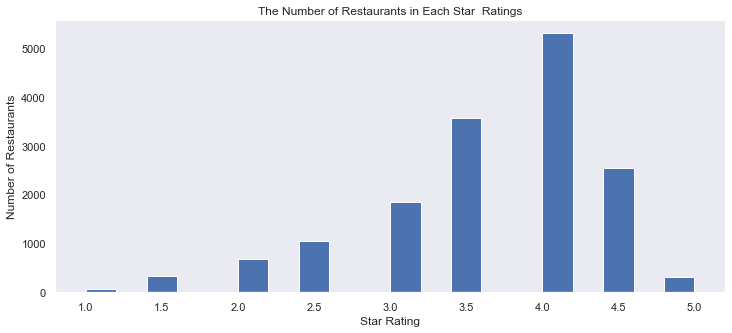

<Figure size 432x288 with 0 Axes>

In [344]:
# Characterize the rating data by using histogram.
Histogram("Rating", cleaned_data,20, title="The Number of Restaurants in Each Star  Ratings")
plt.savefig("./output/starraoting.png", bbox_inches="tight")
plt.show()

In [345]:
# Summary table for the Review Count data by using histogram.

SummaryStats("Review Count", cleaned_data)

,Average Number of Review Count,Median Number of Review Count,Minimum of Review Count,Maximum of Review Count,Standard Deviation of Review Count,Variance of Review Count,Standard Error of Mean of Review Count
0,260.26,91.0,1,12280,260.26,91.0,4.19


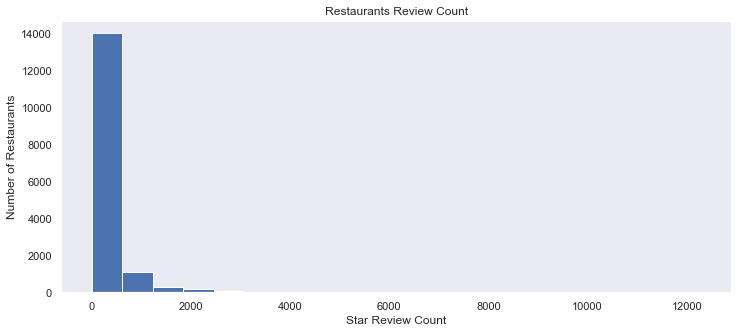

<Figure size 432x288 with 0 Axes>

In [346]:
# Characterize the Review Count data by using histogram.
Histogram("Review Count", cleaned_data,20, title="Restaurants Review Count")
plt.savefig("./output/review_hist.png", bbox_inches="tight")
plt.show()

In [347]:
# Restaurants with top Review Count
city_review=cleaned_data[["Restaurants","City","State","Price","Country","Review Count","Latitude","Longtiude"]]
Avergae_city= city_review.groupby(["Restaurants","City","State","Price","Country","Latitude","Longtiude"]).mean()
top_review_cities=Avergae_city[Avergae_city['Review Count']>500].sort_values('Review Count',ascending = False)
top_review=top_review_cities.head(20)
top_review

,,,,,,,Review Count
Restaurants,City,State,Price,Country,Latitude,Longtiude,
Katz's Delicatessen,New York,NY,$$,US,40.722237,-73.987526,12278.5
Ippudo NY,New York,NY,$$,US,40.730928,-73.990219,9970.5
Porto's Bakery & Cafe,Glendale,CA,$,US,34.150416,-118.255449,8825.0
Girl & the Goat,Chicago,IL,$$$,US,41.884105,-87.647974,8584.0
Pink's Hot Dogs,Los Angeles,CA,$,US,34.083877,-118.344255,7107.5
Au Cheval,Chicago,IL,$$,US,41.884658,-87.647667,7099.0
Porto's Bakery & Cafe,Downey,CA,$,US,33.940755,-118.133572,6884.0
Joe's Shanghai,New York,NY,$$,US,40.715661,-73.996701,6169.5
Pequod's Pizzeria,Chicago,IL,$$,US,41.921916,-87.664334,6144.0


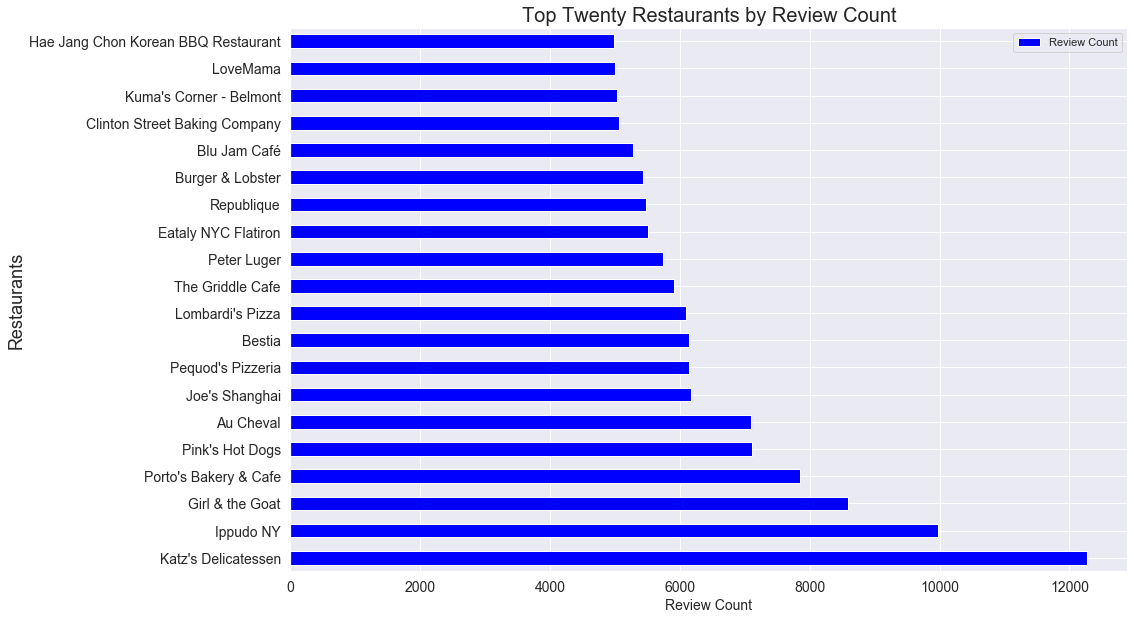

In [348]:
city_review=cleaned_data[["Restaurants","Review Count"]]
Avergae_city= city_review.groupby(["Restaurants"]).mean()
top_review_cities=Avergae_city[Avergae_city['Review Count']>500].sort_values('Review Count',ascending = False)
top_rest=top_review_cities.head(20)
top_rest.sort_values('Review Count',ascending = False)
# Top twinity cities Restaurants sourced
plot_pandas = top_rest.plot.barh(figsize=(15,10), color='blue',fontsize = 14)
plt.xlabel("Review Count",fontsize = 14)
plt.ylabel("Restaurants",fontsize = 18)
plt.title("Top Twenty Restaurants by Review Count",fontsize = 20)


plt.savefig("./output/top_rest_review.png", bbox_inches="tight")
plt.show()


In [349]:
# Restaurants with bottom Review Count
city_review=cleaned_data[["Restaurants","City","State","Price","Country","Review Count"]]
Avergae_city= city_review.groupby(["Restaurants","City","State","Price","Country"]).mean()
top_review_cities=Avergae_city[Avergae_city['Review Count']<100].sort_values('Review Count',ascending = False)
top_review_cities.tail(10)

,,,,,Review Count
Restaurants,City,State,Price,Country,
Tacos El Bombon,Los Angeles,CA,$,US,1.0
Circulo Perfecto Enchiladas Ahogadas,Los Angeles,CA,$,US,1.0
Mr Sub,Markham,ON,$$$,CA,1.0
Life Cafe,Mississauga,ON,$$,CA,1.0
Kaiser Permanente Cafe,Downey,CA,$,US,1.0
Li Jiang,San Gabriel,CA,$,US,1.0
Mr Sub,Oakville,ON,$,CA,1.0
Ragazzi Ristorante,Oakville,ON,$$,CA,1.0
Benny's Pizza,Summit Argo,IL,$$,US,1.0


## Restaurants Pricing Summary 
* The percentage of Restaurants pricing under 10 dollars
* The percentage of Restaurants pricing between 11-30 dollars
* The percentage of Restaurants pricing between 31-60 dollars
* The percentage of Restaurants pricing above 60 dollars


In [350]:
# The percentage of Restaurants pricing under 10 $ (labled as "$" in the dataset)

restaurant_pricing_under_10= cleaned_data.loc[cleaned_data["Price"]=="$"]

restaurant_count_pricing_under_10 = restaurant_pricing_under_10["Restaurants"].count()

percent_restaurant_pricing_under_10= (restaurant_count_pricing_under_10/Restaurant_total_number) * 100

percent_restaurant_pricing_under_10

41.179835992626025

In [351]:
# The percentage of Restaurants pricing between $11-$30 (labled as "$$" in the dataset)

restaurant_pricing_bw_11_30= cleaned_data.loc[cleaned_data["Price"]=="$$"]

restaurant_count_pricing_bw_11_30 = restaurant_pricing_bw_11_30["Restaurants"].count()

percent_restaurant_pricing_bw_11_30= (restaurant_count_pricing_bw_11_30/Restaurant_total_number) * 100

percent_restaurant_pricing_bw_11_30

53.27061216705867

In [352]:
# The percentage of Restaurants pricing between $31-$60 (labled as "$$$" in the dataset)

restaurant_pricing_bw_31_60= cleaned_data.loc[cleaned_data["Price"]=="$$$"]

restaurant_count_pricing_bw_31_60 = restaurant_pricing_bw_31_60["Restaurants"].count()

percent_restaurant_pricing_bw_31_60= (restaurant_count_pricing_bw_31_60/Restaurant_total_number) * 100

percent_restaurant_pricing_bw_31_60

4.456169347148942

In [353]:
# The percentage of Restaurants pricing above$60 (labled as "$$$$" in the dataset)

restaurant_pricing_above_60= cleaned_data.loc[cleaned_data["Price"]=="$$$$"]

restaurant_count_pricing_above_60 = restaurant_pricing_above_60["Restaurants"].count()

percent_restaurant_pricing_bw__above_60= (restaurant_count_pricing_above_60/Restaurant_total_number) * 100

percent_restaurant_pricing_bw__above_60

1.0933824931663594

In [354]:
# create a summary table for price ranges

Restaurants_Pricing_table = pd.DataFrame({
    "Total Restaurant Pricing Under $10":f"{restaurant_count_pricing_under_10:,}",
    "Total Restaurant Pricing $11-30": f"{restaurant_count_pricing_bw_11_30:,}",
    "Total Restaurant Pricing $31-60": f"{restaurant_count_pricing_bw_31_60:,}",
    "Total Restaurant Pricing Above $60": f"{restaurant_count_pricing_above_60:,}",
    "% Pricing Under $10": f"{percent_restaurant_pricing_under_10:.2f}%",
    "% Pricing between $11-30": f"{percent_restaurant_pricing_bw_11_30:.2f}%",
    "% Pricing between $31-60": f"{percent_restaurant_pricing_bw_31_60:.2f}%",
    "% Pricing above $60": f"{percent_restaurant_pricing_bw__above_60:.2f}%",
}, index=[0])

Restaurants_Pricing_table

,Total Restaurant Pricing Under $10,Total Restaurant Pricing $11-30,Total Restaurant Pricing $31-60,Total Restaurant Pricing Above $60,% Pricing Under $10,% Pricing between $11-30,% Pricing between $31-60,% Pricing above $60
0,"6,478","8,380",701,172,41.18%,53.27%,4.46%,1.09%


In [355]:
# Value counts for price ranges and create a dataFrame
count_pricing =cleaned_data['Price'].value_counts().rename_axis('Restaurant Price Range').reset_index(name='Restaurant Counts')
pricing_df=count_pricing.set_index('Restaurant Price Range')
pricing_df.rename(index={'$':'Under $10','$$':'Between $11-30','$$$':'Between $31-60','$$$$':'Above $60'},inplace=True)
pricing_df

,Restaurant Counts
Restaurant Price Range,
Between $11-30,8380
Under $10,6478
Between $31-60,701
Above $60,172


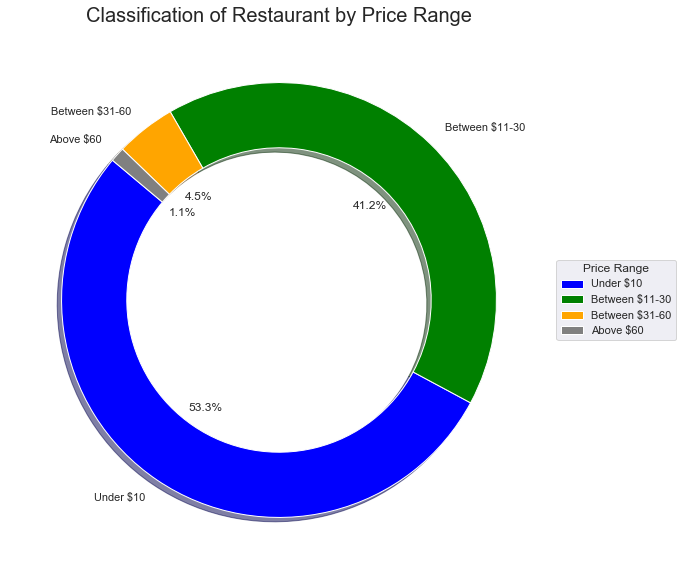

In [356]:

# Create Labels for the sections of the pie
labels = ["Under $10","Between $11-30","Between $31-60","Above $60"]
# select colors for the plot
colors = ['blue','green','orange','gray']
# plot the pi chart 
fig, ax = plt.subplots(figsize=(15, 10))
size = 0.3
cmap = plt.get_cmap("tab20c")
ax.pie(pricing_df, radius=1,labels=labels,colors=colors,wedgeprops=dict(width=size, edgecolor='w'),autopct="%1.1f%%",shadow=True, startangle=140)
plt.title('Classification of Restaurant by Price Range',fontsize = 20)
ax.legend(title="Price Range",loc="center left",bbox_to_anchor=(1, 0, 0.8, 1))

plt.savefig("./output/resturant_price.png", bbox_inches="tight")
plt.show()

## City Summary 
* Total number of restaurants per city
* Total Number of restaurants per state
* Total Number of restaurants per country
* Avergae Rating per city
* Avergae Review Count per city
* Cities getting avergae resturant rating per city greather than 4
* Cities getting avergae resturant review count greater than 500
* Cities getting avergae resturant rating resturant less than 2
* Cities getting avergae resturant review count less than 100


In [357]:
# Total number of restaurants per City
restaurants_Counts =cleaned_data['City'].value_counts().rename_axis('Cities').reset_index(name='Restaurants Counts')
restaurants_Counts.head()

,Cities,Restaurants Counts
0,Los Angeles,2802
1,Chicago,2233
2,Toronto,1039
3,New York,700
4,Brooklyn,585


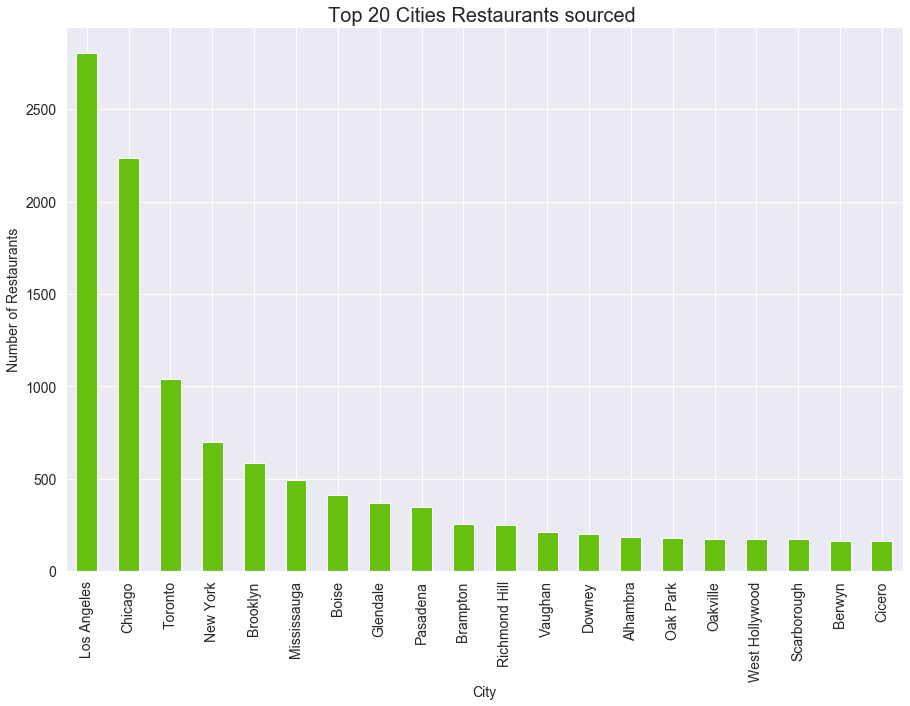

In [358]:
# Top twinity cities Restaurants sourced
count_rest = cleaned_data.groupby(["City"]).count()["Restaurants"] 
sort_cities=count_rest.sort_values(ascending = False)
top_cities=sort_cities.head(20)
plot_pandas = top_cities.plot.bar(figsize=(15,10), color='#66C010',fontsize = 14)
plt.xlabel("City",fontsize = 14)
plt.ylabel("Number of Restaurants",fontsize = 14)
plt.title("Top 20 Cities Restaurants sourced ",fontsize = 20)

plt.savefig("./output/top_ten_cities.png", bbox_inches="tight")
plt.show()

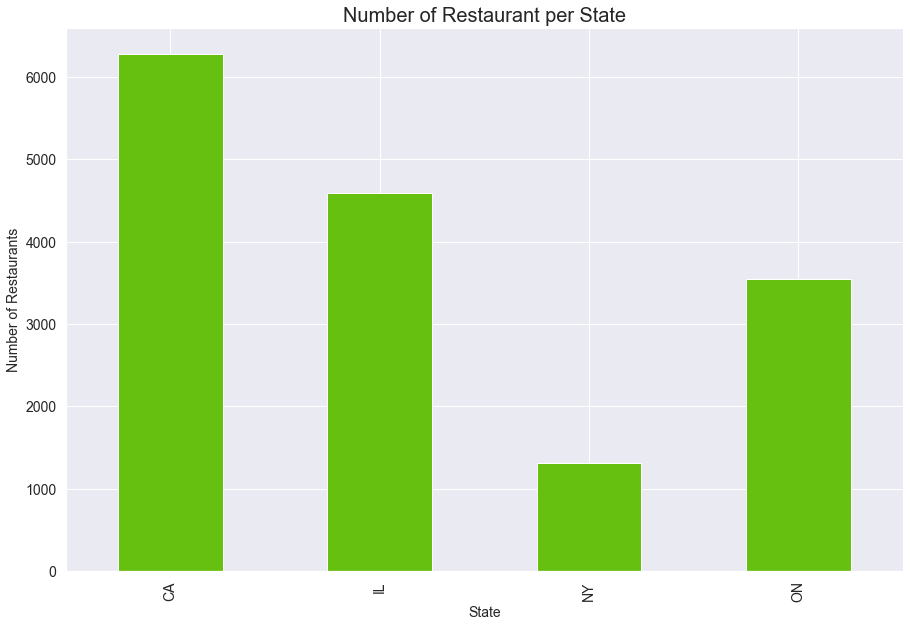

In [359]:
# Number of restaurants per State
Restaurants = cleaned_data.groupby(["State"]).count()["Restaurants"] 
plot_pandas = Restaurants.plot.bar(figsize=(15,10), color='#66C010',fontsize = 14)
Restaurants
plt.xlabel("State",fontsize = 14)
plt.ylabel("Number of Restaurants",fontsize = 14)
plt.title("Number of Restaurant per State",fontsize = 20)

plt.savefig("./output/states.png", bbox_inches="tight")
plt.show()

In [360]:
# Number of restaurants by Country 
rest_country= cleaned_data.groupby(["Country"]).count()["Restaurants"] 
rest_country

Country
CA     3546
US    12185
Name: Restaurants, dtype: int64

In [361]:
# Avrage rating of restaurants per City
Avergae_rating_city= cleaned_data.groupby(["City"]).mean()["Rating"]
Avergae_rating_city

City
Ajax               3.347619
Alhambra           3.521858
Altadena           4.500000
Amf O'Hare         3.500000
Atwater Village    3.500000
                     ...   
Willow Springs     3.000000
Wilmette           3.796296
Winnetka           4.000000
Woodbridge         3.630000
York               3.600000
Name: Rating, Length: 189, dtype: float64

In [362]:
# Avrage review Count of restaurants per City
Avergae_review_Count_city= cleaned_data.groupby(["City"]).mean()["Review Count"]
Avergae_review_Count_city

City
Ajax                21.466667
Alhambra           467.688525
Altadena           119.000000
Amf O'Hare          26.000000
Atwater Village    763.000000
                      ...    
Willow Springs     113.000000
Wilmette           116.407407
Winnetka            44.000000
Woodbridge          36.080000
York                 8.400000
Name: Review Count, Length: 189, dtype: float64

In [363]:
# Cities getting avergae resturant rating greather than 4
city_rating=cleaned_data[["City","State","Country","Rating"]]
Avergae_city= city_rating.groupby(["City","State","Country",]).mean()
top_rating_cities=Avergae_city[Avergae_city['Rating']>4].sort_values('Rating',ascending = False)
top_rating_cities.head(10)

,,,Rating
City,State,Country,
Fullerton,CA,US,5.000000
Boyle Heights,CA,US,5.000000
Melba Id,IL,US,5.000000
Hazard,CA,US,5.000000
El Sereno,CA,US,4.666667
Altadena,CA,US,4.500000
North Utica,IL,US,4.500000
Lennox,CA,US,4.500000
La Canada Flintridge,CA,US,4.500000


In [364]:
# Cities getting avergae resturant review count greater than 500
city_review=cleaned_data[["City","State","Country","Review Count"]]
Avergae_city= city_review.groupby(["City","State","Country"]).mean()
top_review_cities=Avergae_city[Avergae_city['Review Count']>260].sort_values('Review Count',ascending = False)
top_review_cities.head(10)

,,,Review Count
City,State,Country,
New York,NY,US,905.291429
Hollywood,CA,US,840.761905
Universal City,CA,US,805.700000
Atwater Village,CA,US,763.000000
Studio City,CA,US,741.642857
Beverly Hills,CA,US,679.960000
West Hollywood,CA,US,629.959538
Silver Lake,CA,US,618.500000
Pasadena,CA,US,549.063768


In [365]:
# Cities getting avergae resturant rating less than 2
city_rating=cleaned_data[["City","State","Country","Rating"]]
Avergae_city= city_rating.groupby(["City","State","Country"]).mean()
bottom_rating_cities=Avergae_city[Avergae_city['Rating']<2.5].sort_values('Rating',ascending =True)
bottom_rating_cities.head(10)

,,,Rating
City,State,Country,
Scott,IL,US,1.0
E Los Angeles,CA,US,1.5
Jacksonville,IL,US,1.5
Pekin,CA,US,1.5
Seaside,CA,US,1.5
O'Hare,IL,US,2.0
City Of Commerce,CA,US,2.3


In [366]:
# Cities getting avergae resturant review count less than 100
city_review=cleaned_data[["City","State","Country","Review Count"]]
Avergae_city= city_review.groupby(["City","State","Country"]).mean()
bottom_review_cities=Avergae_city[Avergae_city['Review Count']<100].sort_values('Review Count',ascending = True)
bottom_review_cities.head(10)

,,,Review Count
City,State,Country,
Fullerton,CA,US,1.000000
Melba Id,IL,US,2.000000
Gormley,ON,CA,3.000000
South El Monte,CA,US,3.000000
Florence-Graham,CA,US,4.666667
Summit Argo,IL,US,4.666667
Oakridges,ON,CA,5.000000
Manhattan Beach,CA,US,6.000000
Saint Clairsville,CA,US,7.000000


In [367]:
# Cities geting average restaurants Review Count greater than 500 & rating greater than 4 (Best record)
city_rating_review=cleaned_data[["City","State","Country","Rating","Review Count"]]
Avergae_city_rate_rev= city_rating_review.groupby(["City","State","Country"]).mean()
top_review_cities=Avergae_city_rate_rev[(Avergae_city_rate_rev['Review Count']>200) & (Avergae_city_rate_rev['Rating']>=4)].sort_values('Rating',ascending = False)
top_head_p=top_review_cities.head(10)
top_head_p


,,,Rating,Review Count
City,State,Country,,
East York,ON,CA,4.500000,259.000000
Greenpoint,NY,US,4.500000,201.000000
La Canada Flintridge,CA,US,4.500000,332.500000
Studio City,CA,US,4.142857,741.642857
Long Island City,NY,US,4.071429,544.928571
New York,NY,US,4.050714,905.291429
Brooklyn,NY,US,4.040171,416.037607
Boerum Hill,NY,US,4.000000,376.000000
Brooklyn Heights,NY,US,4.000000,273.000000


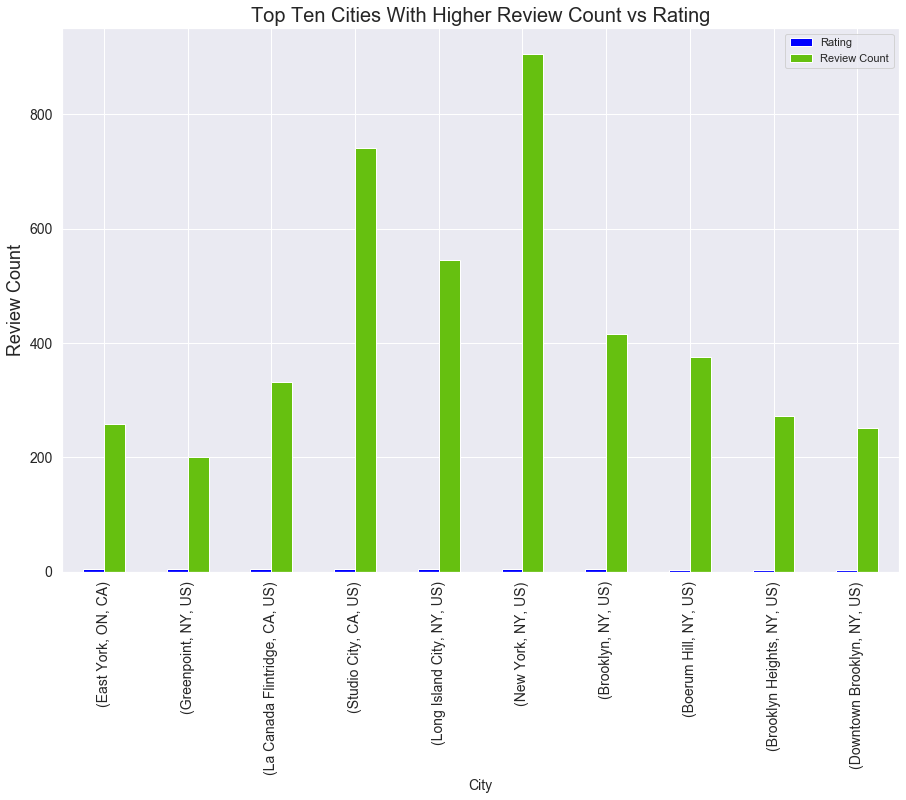

In [368]:
# Top twinity cities restaurants sourced
plot_pandas =top_head_p.plot.bar(figsize=(15,10), color=['blue','#66C010'],fontsize = 14)
plt.xlabel("City",fontsize = 14)
plt.ylabel("Review Count",fontsize = 18)
plt.title("Top Ten Cities With Higher Review Count vs Rating",fontsize = 20)


plt.savefig("./output/top_review_city.png", bbox_inches="tight")
plt.show()

In [369]:
# Cities geting average restaurants Review Count less than 100 & rating less than 2  (Worst record)
city_rating_review=cleaned_data[["City","State","Country","Rating","Review Count"]]
Avergae_city_rate_rev= city_rating_review.groupby(["City","State","Country",]).mean()
top_review_cities=Avergae_city_rate_rev[(Avergae_city_rate_rev['Review Count']<100) & (Avergae_city_rate_rev['Rating']>=2)].sort_values('Rating',ascending = True)
top_review_cities.head(10)


,,,Rating,Review Count
City,State,Country,,
O'Hare,IL,US,2.000000,33.000000
City Of Commerce,CA,US,2.300000,81.800000
Southgate,CA,US,2.500000,58.000000
Saint Clairsville,CA,US,2.500000,7.000000
N.Riverside,IL,US,2.500000,22.000000
Los Angeles (Eagle Rock),CA,US,2.500000,60.000000
South El Monte,CA,US,2.500000,3.000000
Walnut Park,CA,US,2.571429,86.285714
Broadview,IL,US,2.692308,37.692308


## Correlation and Regression

## Avergae Review Count Versus Star Rating

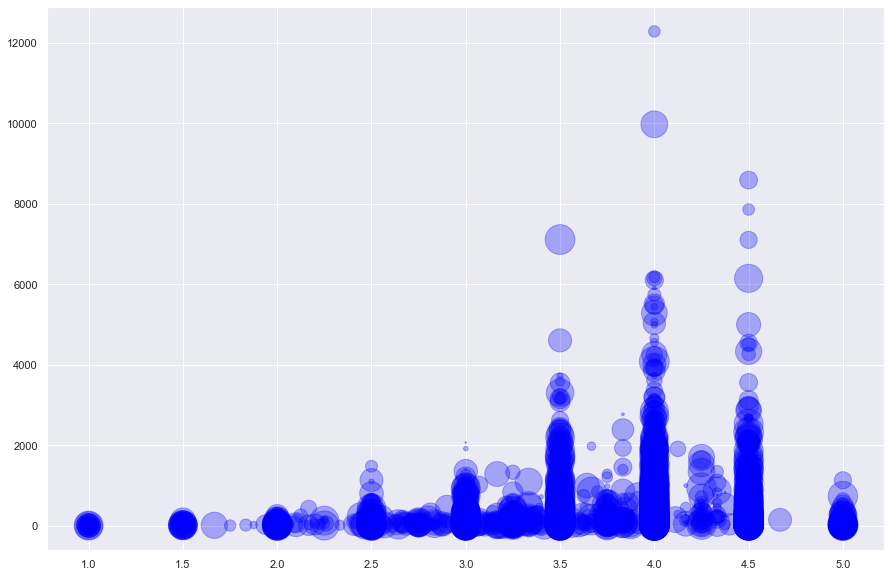

In [370]:
# A scatter plot of Review count vs Star Rating
area = (30 * np.random.rand(len(review_count_star)))**2

review_count_star= cleaned_data.groupby(["Restaurants"]).mean()
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(review_count_star['Rating'],review_count_star['Review Count'],marker="o", s=area, c="blue", alpha=0.3)

plt.savefig("./output/scatter_plot_rating.png", bbox_inches="tight")
plt.show()


In [371]:
# pearson correlation on review Count versus star rating 
corr=round(st.pearsonr(review_count_star['Rating'],review_count_star['Review Count'])[0],2)
print(f"The correlation between star rating  and review count is {corr}")


The correlation between star rating  and review count is 0.11


In [372]:
# Performing regression on review count versus star rating
x_values = review_count_star['Rating']
y_values = review_count_star['Review Count']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x" + str(round(intercept,2))

print(line_eq)

slope:95.68422000695489
intercept:-86.49902856380959
rvalue (Correlation coefficient):0.11313134299003282
pandas (Correlation coefficient):0.11
stderr:7.859919987391357
y = 95.68x-86.5


The r-squared is: 0.012798700766728448


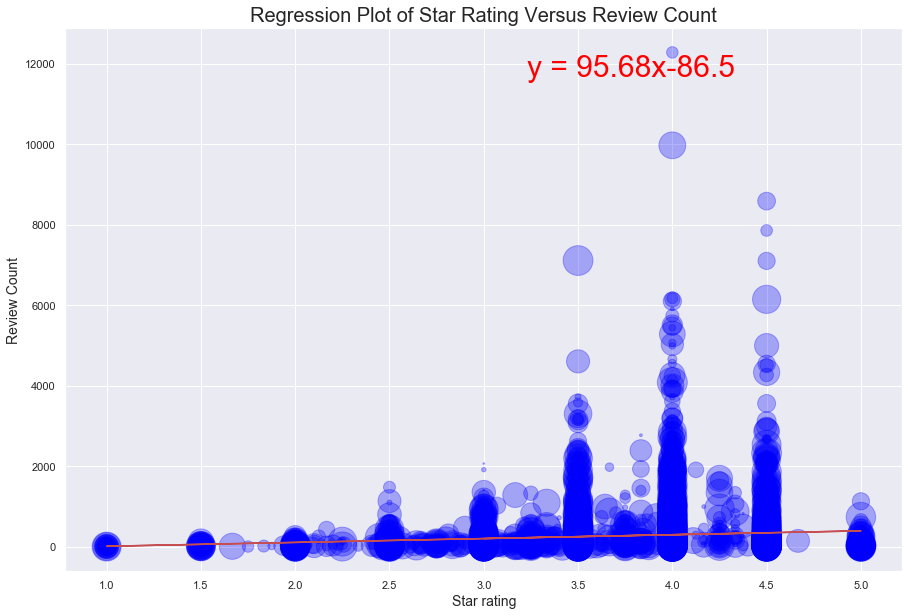

In [373]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,marker="o", s=area, c="blue", alpha=0.3)
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Star Rating Versus Review Count',fontsize =20)
plt.xlabel('Star rating',fontsize =14)
plt.ylabel('Review Count',fontsize =14)
ax1.annotate(line_eq, xy=(1, 30), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("./output/regression_star_review.png", bbox_inches="tight")
plt.show()

# Price Versus Star Rating

In [374]:
# Index coulumns of restaurants, review count ,rating , and price
price_star_rating= cleaned_data[["Restaurants","Review Count","Rating","Price"]]
# Price is a categorical data so we generate a dummies to represent the values 
df_dummies = pd.get_dummies(price_star_rating['Price'])
# then new dataframe is created after that
df_new = pd.concat([price_star_rating, df_dummies], axis=1)
del df_new['Price'] 
# Rename the column heading
df_new.rename(columns={'$':'Under $10','$$':'Between $11-30','$$$':'Between $31-60','$$$$':'Above $60'},inplace=True)

In [375]:
# Create the avergae of price range values
star_rating_price= df_new.groupby(["Restaurants"]).mean()
star_rating_price.head()

,Review Count,Rating,Under $10,Between $11-30,Between $31-60,Above $60
Restaurants,,,,,,
#1 Buffet,191.0,3.00,0.0,1.0,0.0,0.0
#1 Chop suey,36.0,3.00,0.0,1.0,0.0,0.0
#1 Mongolian BBQ - Best Stir Fried Noodles In Boise,45.0,3.50,0.0,1.0,0.0,0.0
08-Aug,97.0,3.25,0.0,1.0,0.0,0.0
101 Asian Kitchen,164.0,3.50,0.0,1.0,0.0,0.0


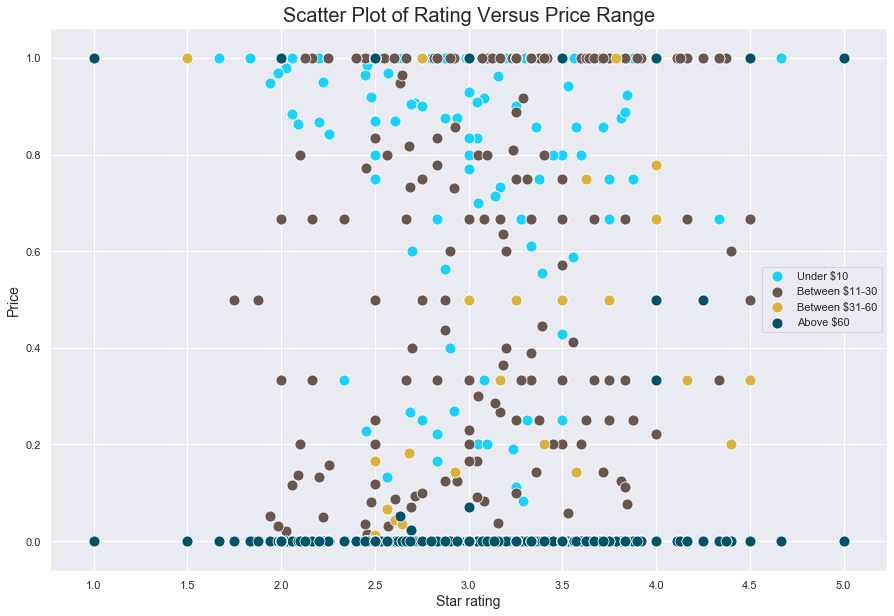

In [376]:
# Scatter plot of rating versus price ranges
#lables
labels = ["Under $10","Between $11-30","Between $31-60","Above $60"]

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(star_rating_price['Rating'],star_rating_price['Under $10'],s=120, color="#1CD0F8")
sns.scatterplot(star_rating_price['Rating'],star_rating_price['Between $11-30'],s=120, color="#68574F")
sns.scatterplot(star_rating_price['Rating'],star_rating_price['Between $31-60'],s=120, color="#D9B340")
sns.scatterplot(star_rating_price['Rating'],star_rating_price['Above $60'],s=120, color="#005369")

plt.title('Scatter Plot of Rating Versus Price Range',fontsize =20)
plt.xlabel('Star rating',fontsize =14)
plt.legend(labels)
plt.ylabel('Price',fontsize =14)

plt.savefig("./output/scatter_rating_price.png", bbox_inches="tight")
plt.show()

In [377]:
# Summary of correlation matrix 
corrrelation=star_rating_price.corr()
corrrelation

,Review Count,Rating,Under $10,Between $11-30,Between $31-60,Above $60
Review Count,1.000000,0.113131,-0.196615,0.133722,0.101312,0.042288
Rating,0.113131,1.000000,-0.025285,-0.001637,0.038343,0.036130
Under $10,-0.196615,-0.025285,1.000000,-0.865389,-0.178565,-0.086591
Between $11-30,0.133722,-0.001637,-0.865389,1.000000,-0.282406,-0.137644
Between $31-60,0.101312,0.038343,-0.178565,-0.282406,1.000000,-0.025566
Above $60,0.042288,0.036130,-0.086591,-0.137644,-0.025566,1.000000


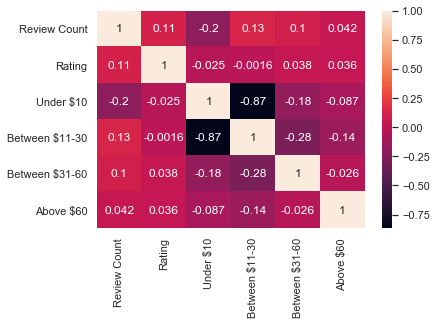

In [378]:
# plot the correlation matrix
corrMatrix=star_rating_price.corr()
sns.heatmap(corrMatrix,annot=True)
plt.savefig("./output/corrmatrix.png", bbox_inches="tight")
plt.show()

In [379]:
corrrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

,Review Count,Rating,Under $10,Between $11-30,Between $31-60,Above $60
Review Count,1.00,0.11,-0.20,0.13,0.10,0.04
Rating,0.11,1.00,-0.03,-0.00,0.04,0.04
Under $10,-0.20,-0.03,1.00,-0.87,-0.18,-0.09
Between $11-30,0.13,-0.00,-0.87,1.00,-0.28,-0.14
Between $31-60,0.10,0.04,-0.18,-0.28,1.00,-0.03
Above $60,0.04,0.04,-0.09,-0.14,-0.03,1.00


In [380]:
# Regression 
# Rating vesrus price Under $10 
corr=round(st.pearsonr(star_rating_price['Rating'],star_rating_price['Under $10'])[0],2)
print(f"The correlation between star rating and price under $10 is {corr}")

x_values_rprice_10 = star_rating_price['Rating']
y_values_rprice_10 = star_rating_price['Under $10']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_rprice_10, y_values_rprice_10)
regress_rvalues_10 = x_values_rprice_10 * slope + intercept
line_req_10 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between star rating and price under $10 is -0.03
slope:-0.019903657003628977
intercept:0.4282721534724144
rvalue (Correlation coefficient):-0.02528488909125206
pandas (Correlation coefficient):-0.03
stderr:0.007360220773055793
y = -0.02x + 0.43


In [381]:
# Rating vesrus price Between $11-30
corr=round(st.pearsonr(star_rating_price['Rating'],star_rating_price['Between $11-30'])[0],2)
print(f"The correlation between star rating and price between $11-30 is {corr}")

x_values_rprice_30 = star_rating_price['Rating']
y_values_rprice_30 = star_rating_price['Between $11-30']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_rprice_30, y_values_rprice_30)
regress_rvalues_30 = x_values_rprice_30 * slope + intercept
line_req_30 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between star rating and price between $11-30 is -0.0
slope:-0.0013314956293344327
intercept:0.5850044520748261
rvalue (Correlation coefficient):-0.0016372584865180474
pandas (Correlation coefficient):-0.0
stderr:0.007606411217390575
y = -0.0x + 0.59


In [382]:
# Rating vesrus price Between $31-60

corr=round(st.pearsonr(star_rating_price['Rating'],star_rating_price['Between $31-60'])[0],2)
print(f"The correlation between star rating and price between $31-60 is {corr}")

x_values_rprice_60 = star_rating_price['Rating']
y_values_rprice_60 = star_rating_price['Between $31-60']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_rprice_60, y_values_rprice_60)
regress_rvalues_60 = x_values_rprice_60 * slope + intercept
line_req_60 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between star rating and price between $31-60 is 0.04
slope:0.014381738269520768
intercept:-0.00048193463772294026
rvalue (Correlation coefficient):0.03834341310582956
pandas (Correlation coefficient):0.04
stderr:0.003505572967908104
y = 0.01x + -0.0


In [383]:
# Rating vesrus price Above $60
corr=round(st.pearsonr(star_rating_price['Rating'],star_rating_price['Above $60'])[0],2)
print(f"The correlation between star rating and price above $60 is {corr}")

x_values_rprice_u60 = star_rating_price['Rating']
y_values_rprice_u60 = star_rating_price['Above $60']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_rprice_u60,y_values_rprice_u60)
regress_rvalues_u60 = x_values_rprice_u60 * slope + intercept
line_req_u60 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between star rating and price above $60 is 0.04
slope:0.00685341436344266
intercept:-0.012794670909517572
rvalue (Correlation coefficient):0.036129637869186125
pandas (Correlation coefficient):0.04
stderr:0.0017730363155766741
y = 0.01x + -0.01


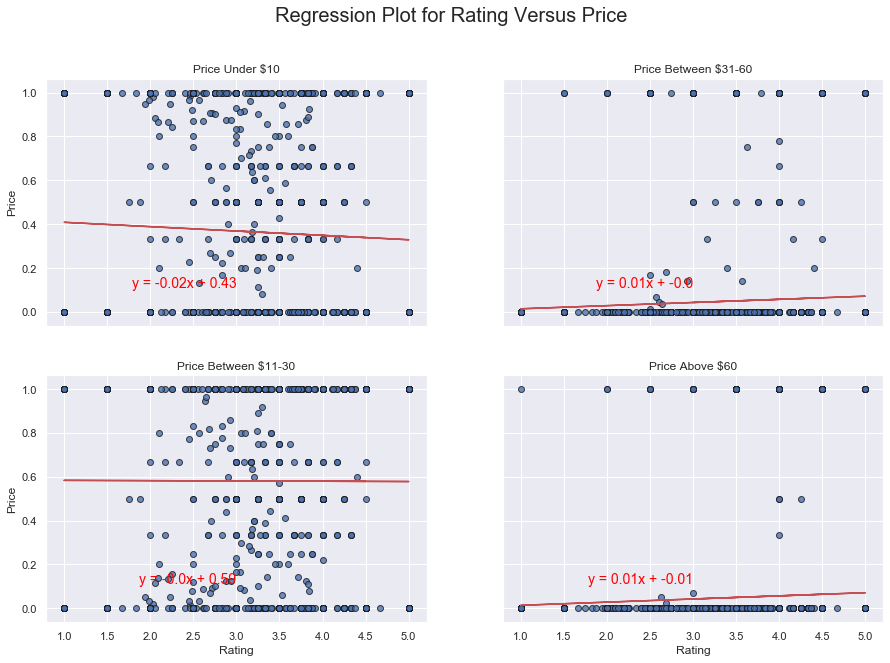

In [384]:
# Regression plot for price versus rating

fig, ax = plt.subplots(2, 2,figsize=(15,10))
fig.suptitle("Regression Plot for Rating Versus Price",fontsize =20)
# Price Under $10 versus rating
ax[0, 0].scatter(x_values_rprice_10,y_values_rprice_10,alpha = 0.80, edgecolors = "k", linewidths = 1) #row=0, col=0
ax[0, 0].plot(x_values_rprice_10,regress_rvalues_10,"r-")
ax[0, 0].set_title('Price Under $10')
ax[0, 0].annotate(line_req_10,xy=(1, 0.6),fontsize=14,xycoords='data',xytext=(0.5, 0.2), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")

# Price Between $11-30 versus rating

ax[1, 0].scatter(x_values_rprice_30,y_values_rprice_30,alpha = 0.80, edgecolors = "k", linewidths = 1) #row=0, col=0
ax[1, 0].plot(x_values_rprice_30,regress_rvalues_30,"r-")
ax[1, 0].set_title('Price Between $11-30')
ax[1, 0].annotate(line_req_30,xy=(1, 0.6),fontsize=14,xycoords='data',xytext=(0.5, 0.2), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
# Price Between $31-60 versus rating
ax[0, 1].scatter(x_values_rprice_60,y_values_rprice_60,alpha = 0.80, edgecolors = "k", linewidths = 1) #row=0, col=0
ax[0, 1].plot(x_values_rprice_60,regress_rvalues_60,"r-")
ax[0, 1].set_title('Price Between $31-60')
ax[0, 1].annotate(line_req_60,xy=(1, 0.6),fontsize=14,xycoords='data',xytext=(0.5, 0.2), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
# Price Above $60 versus rating

ax[1, 1].scatter(x_values_rprice_u60,y_values_rprice_u60,alpha = 0.80, edgecolors = "k", linewidths = 1) #row=0, col=0
ax[1, 1].plot(x_values_rprice_u60,regress_rvalues_60,"r-")
ax[1, 1].set_title('Price Above $60')
ax[1, 1].annotate(line_req_u60,xy=(1, 0.6),fontsize=14,xycoords='data',xytext=(0.5, 0.2), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
for axs in ax.flat:
    axs.set(xlabel='Rating', ylabel='Price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()
    
    
    
plt.savefig("./output/regression_price_rating.png", bbox_inches="tight")
plt.show()

# Price Versus 	Review Count

In [385]:
# Review Coun vesrus price Under $10
corr=round(st.pearsonr(star_rating_price['Review Count'],star_rating_price['Under $10'])[0],2)
print(f"The correlation between star rating and price under $10 is {corr}")

x_values_price_10 = star_rating_price['Under $10']
y_values_price_10 = star_rating_price['Review Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_price_10, y_values_price_10)
regress_values_10 = x_values_price_10 * slope + intercept
line_eq_10 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between star rating and price under $10 is -0.2
slope:-211.25239508177336
intercept:352.19601634347157
rvalue (Correlation coefficient):-0.19661474717437738
pandas (Correlation coefficient):-0.2
stderr:9.85331899585434
y = -211.25x + 352.2


In [386]:
# Review Coun vesrus price Between $11-30

corr=round(st.pearsonr(star_rating_price['Review Count'],star_rating_price['Between $11-30'])[0],2)
print(f"The correlation between star rating and price Between $11-3 is {corr}")

x_values_price_30 = star_rating_price['Between $11-30']
y_values_price_30 = star_rating_price['Review Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_price_30, y_values_price_30)
regress_values_30 = x_values_price_30 * slope + intercept
line_eq_30 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between star rating and price Between $11-3 is 0.13
slope:139.07119311667117
intercept:197.0754894934777
rvalue (Correlation coefficient):0.13372182566925106
pandas (Correlation coefficient):0.13
stderr:9.639948437615663
y = 139.07x + 197.08


In [387]:
# Review Coun vesrus price Between $31-60
corr=round(st.pearsonr(star_rating_price['Review Count'],star_rating_price['Between $31-60'])[0],2)
print(f"The correlation between star rating and price between $31-60 is {corr}")

x_values_price_60 = star_rating_price['Between $31-60']
y_values_price_60 = star_rating_price['Review Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_price_60, y_values_price_60)
regress_values_60 = x_values_price_60 * slope + intercept
line_eq_60 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between star rating and price between $31-60 is 0.1
slope:228.45378528291639
intercept:265.3313238417413
rvalue (Correlation coefficient):0.10131216410285977
pandas (Correlation coefficient):0.1
stderr:20.982358517726176
y = 228.45x + 265.33


In [388]:
# Review Coun vesrus price Between $31-60
corr=round(st.pearsonr(star_rating_price['Review Count'],star_rating_price['Above $60'])[0],2)
print(f"The correlation between star rating and price between above $60 is {corr}")

x_values_price_u60 = star_rating_price['Above $60']
y_values_price_u60 = star_rating_price['Review Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_price_u60, y_values_price_u60)
regress_values_u60 = x_values_price_u60 * slope + intercept
line_eq_u60 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between star rating and price between above $60 is 0.04
slope:188.5532762997981
intercept:275.221410053901
rvalue (Correlation coefficient):0.042288286358483536
pandas (Correlation coefficient):0.04
stderr:41.666134573252464
y = 188.55x + 275.22


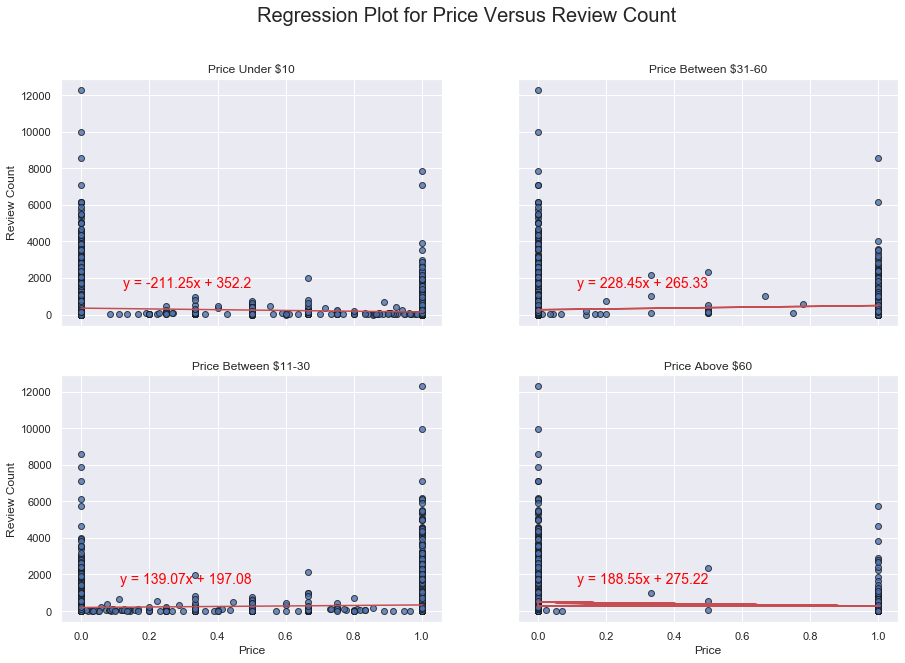

In [389]:
# Regression plot for price versus Review Count

fig, ax = plt.subplots(2, 2,figsize=(15,10))
fig.suptitle("Regression Plot for Price Versus Review Count",fontsize =20)
# Price Under $10 versus rating
ax[0, 0].scatter(x_values_price_10,y_values_price_10,alpha = 0.80, edgecolors = "k", linewidths = 1) 
ax[0, 0].plot(x_values_price_10,regress_values_10,"r-")
ax[0, 0].set_title('Price Under $10')
ax[0, 0].annotate(line_eq_10,xy=(1, 0.6),fontsize=14,xycoords='data',xytext=(0.5, 0.2), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")

# Price Between $11-30 versus rating

ax[1, 0].scatter(x_values_price_30,y_values_price_30,alpha = 0.80, edgecolors = "k", linewidths = 1)
ax[1, 0].plot(x_values_price_30,regress_values_30,"r-")
ax[1, 0].set_title('Price Between $11-30')
ax[1, 0].annotate(line_eq_30,xy=(1, 0.6),fontsize=14,xycoords='data',xytext=(0.5, 0.2), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
# Price Between $31-60 versus rating
ax[0, 1].scatter(x_values_price_60,y_values_price_60,alpha = 0.80, edgecolors = "k", linewidths = 1)
ax[0, 1].plot(x_values_price_60,regress_values_60,"r-")
ax[0, 1].set_title('Price Between $31-60')
ax[0, 1].annotate(line_eq_60,xy=(1, 0.6),fontsize=14,xycoords='data',xytext=(0.5, 0.2), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
# Price Above $60 versus rating

ax[1, 1].scatter(x_values_price_u60,y_values_price_u60,alpha = 0.80, edgecolors = "k", linewidths = 1) 
ax[1, 1].plot(x_values_price_u60,regress_values_60,"r-")
ax[1, 1].set_title('Price Above $60')
ax[1, 1].annotate(line_eq_u60,xy=(1, 0.6),fontsize=14,xycoords='data',xytext=(0.5, 0.2), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
for axs in ax.flat:
    axs.set(xlabel='Price', ylabel='Review Count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()
    
plt.savefig("./output/regression_price_review.png", bbox_inches="tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [390]:
# Review count 
review_df =cleaned_data["Review Count"]
quartiles =review_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Review count: {lowerq}")
print(f"The upper quartile of Review count: {upperq}")
print(f"The interquartile range of Review count: {iqr}")
print(f"The median of Review count: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Review count: 28.0
The upper quartile of Review count: 271.0
The interquartile range of Review count: 243.0
The median of Review count: 91.0 
Values below -336.5 could be outliers.
Values above 635.5 could be outliers.


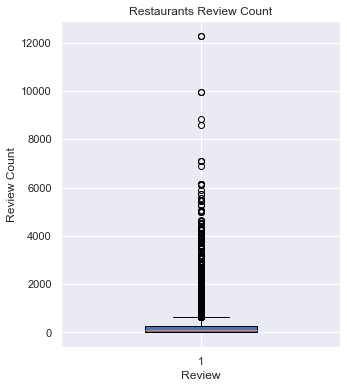

In [391]:
#look for outliers
fig1, ax1 = plt.subplots(figsize=(5, 6))
ax1.set_title('Restaurants Review Count')
ax1.set_ylabel('Review Count')
ax1.set_xlabel('Review')
ax1.boxplot(cleaned_data['Review Count'],widths = 0.4, patch_artist=True,vert=True)

plt.savefig("./output/box_plot_review.png", bbox_inches="tight")
plt.show()


## Google Heat Map

In [392]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

In [223]:
# plot latitude and longitude
locations = cleaned_data[["Latitude","Longtiude"]]
#highlight where all restaurants are
restaurants = cleaned_data["Restaurants"]

# Heat map of all Restaurants
fig = gmaps.figure(center=(20.0, -70.0), zoom_level=2)
#Display heatlayer of all restaurant locations
heat_layer = gmaps.heatmap_layer(locations, dissipating=False, max_intensity=0, point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [224]:
#coordinates of top 20 review count restaurants

coordinates = [
    (40.722237, -73.987526),
    (40.730928, -73.990219),
    (41.884105, -87.647974),
    (34.045585, -118.194510),
    (34.083877, -118.344255),
    (41.884658, -87.647667),
    (40.715661, -73.996701),
    (41.921916, -87.664334),
    (34.033862, -118.229305),
    (40.721566, -73.995683),
    (34.097741, -118.362254),
    (40.709801, -73.962498),
    (40.741998, -73.989942),
    (34.064141, -118.343701),
    (40.74005, -73.993356),
    (34.083775, -118.350532),
    (40.721196, -73.983859),
    (41.939532, -87.700461),
    (40.730386, -73.986061),
    (34.063889, -118.306075)
]

# map of Restaurants with top Review Count
fig = gmaps.figure(center=(20.0, -70.0), zoom_level=2)
markers = gmaps.marker_layer(coordinates)
fig.add_layer(markers) 
fig

Figure(layout=FigureLayout(height='420px'))

In [319]:
city_rated_review=cleaned_data[["Restaurants","City","State","Price","Rating","Country","Review Count","Latitude","Longtiude"]]
Avergae_rated_review= city_rated_review.groupby(["Restaurants","City","State","Price","Country","Latitude","Longtiude"]).mean()

top_review_rated=Avergae_rated_review.sort_values(['Rating', 'Review Count'],ascending=[False, False])
top_20=top_review_rated.head(20)
top_20


,,,,,,,Rating,Review Count
Restaurants,City,State,Price,Country,Latitude,Longtiude,,
Tropicali,Big Bear Lake,IL,$$,US,34.241036,-116.915579,5.0,1126.0
Pisces Poke & Ramen,Los Angeles,CA,$$,US,34.095470,-118.158667,5.0,734.0
Churros Don Abel,East Los Angeles,CA,$,US,34.019054,-118.151978,5.0,648.0
Penumbra,Chicago,IL,$$,US,41.924442,-87.710931,5.0,548.0
Creamy Spoon French Bistro,Glendale,CA,$$,US,34.146675,-118.246781,5.0,511.0
The Old German Deli,Big Bear Lake,IL,$$,US,34.240516,-116.915464,5.0,387.0
Heritage Eatery,Glendale,CA,$$,US,34.148248,-118.255883,5.0,345.0
The Crepe Shop,Chicago,IL,$,US,41.935920,-87.644497,5.0,339.0
Parsnip,Los Angeles,CA,$$,US,34.112249,-118.235545,5.0,333.0


In [320]:
# map of top 20 restaurants with rated  and Review Count

top_review_rated_coordinates = [
(34.241036, -116.915579),
(34.095470, -118.158667),
(34.019054, -118.151978),
(41.924442, -87.710931),
(34.146675, -118.246781),
(34.240516, -116.915464),
(34.148248, -118.255883),
(41.935920, -87.644497),
(34.112249, -118.235545),
(34.057474, -118.345122),
(41.886009, -87.645125),
(40.706068, -73.932610),
(34.121200, -118.203478),
(34.064186, -118.283928),
(41.953342, -87.778746),
(40.720069, -73.990337),
(34.138885, -118.212937),
(41.981560, -87.692533),
(33.974789, -118.228088),
(34.097586, -118.364149)
]

fig = gmaps.figure(center=(20.0, -70.0), zoom_level=2)
marker_points = gmaps.marker_layer(top_review_rated_coordinates)
fig.add_layer(marker_points)
fig

Figure(layout=FigureLayout(height='420px'))